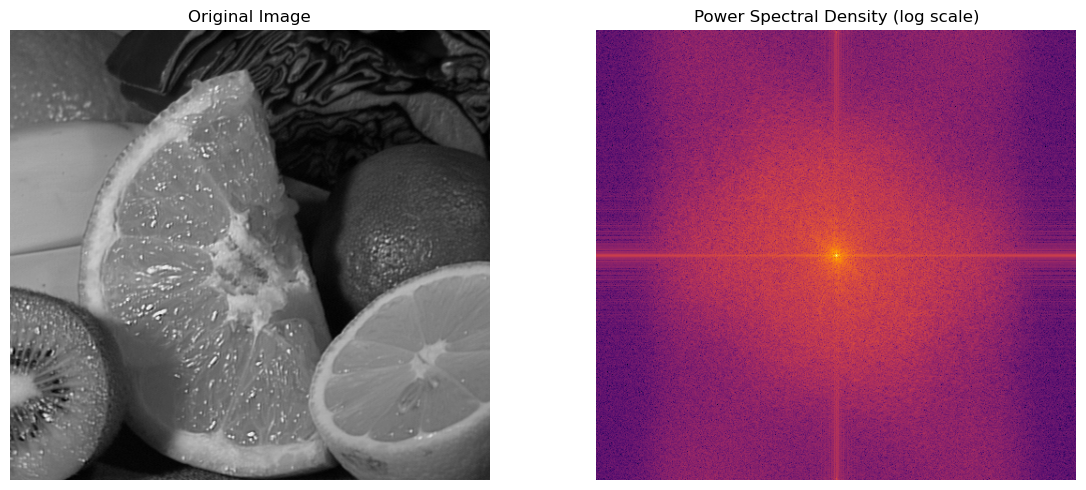

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys

def compute_psd(image_array):
    """
    Compute the Power Spectral Density (PSD) of a 2D image.
    """
    img_float = image_array.astype(float)
    fft_result = np.fft.fft2(img_float)
    fft_shifted = np.fft.fftshift(fft_result)
    psd = np.abs(fft_shifted) ** 2
    return psd

# FIX: Function definition must use a variable name (image_path), not a specific string.
def main(image_path):
    try:
        # Load image and convert to grayscale
        img = Image.open(image_path).convert('L')
        img_array = np.array(img)

        # Compute PSD
        psd = compute_psd(img_array)

        # Plotting
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(img_array, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(np.log1p(psd), cmap='inferno')
        plt.title("Power Spectral Density (log scale)")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{image_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    # If you want to run it directly in an IDE without command line arguments, 
    # replace 'sys.argv[1]' with your actual path in quotes.
    if len(sys.argv) == 2:
        main(sys.argv[1])
    else:
        # Hardcoding your path here for convenience if no argument is provided
        path = r"C:\Users\3kp05\Downloads\fruits.bmp"
        main(path)